In [1]:
import pandas as pd
import numpy as np
import random
import os
from PIL import Image, ImageFile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#load and shuffle df
df=pd.read_pickle("../source_data/data.pickle")

In [3]:
#count of each column and first 5 rows
print(df.count())
#if it gives error of _data attribute try again after updating pandas, that solved the issue for me.

name                   2400
age_approx             2400
anatom_general_site    2378
sex                    2400
image                  2400
image_name             2400
labels                 2400
dtype: int64


In [4]:
#sample of the data
df.head()

,name,age_approx,anatom_general_site,sex,image,image_name,labels
0,ISIC_0010463,30,anterior torso,male,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0010463.jpeg,benign
1,ISIC_0011059,65,posterior torso,male,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0011059.jpeg,benign
2,ISIC_0025081,30,anterior torso,female,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0025081.jpeg,malignant
3,ISIC_0000373,40,posterior torso,male,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0000373.jpeg,benign
4,ISIC_0011125,70,anterior torso,male,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0011125.jpeg,malignant


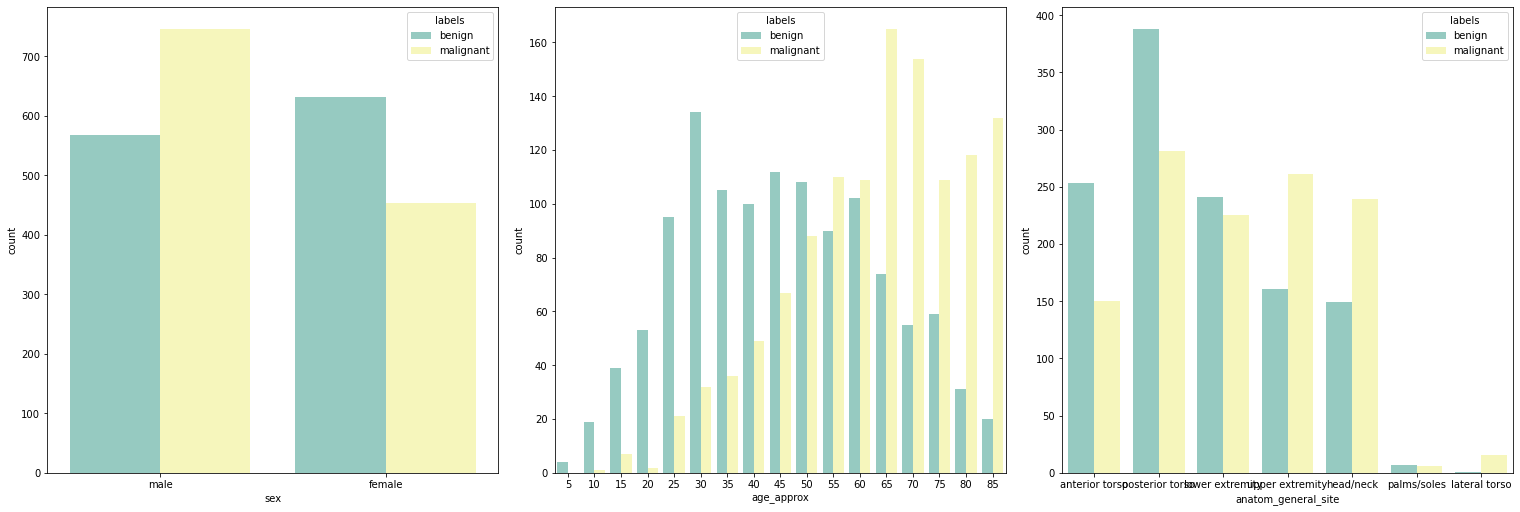

In [5]:
#plotting sex, age and anatom general site against number of respective benign and malignant
categorical_vars = ["sex","age_approx","anatom_general_site"]
num_plots = len(categorical_vars)
total_cols = 3
total_rows = 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(categorical_vars):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, hue="labels", hue_order=["benign","malignant"], data=df, ax=axs[pos],palette="Set3")
plt.savefig("cat_vars.png")

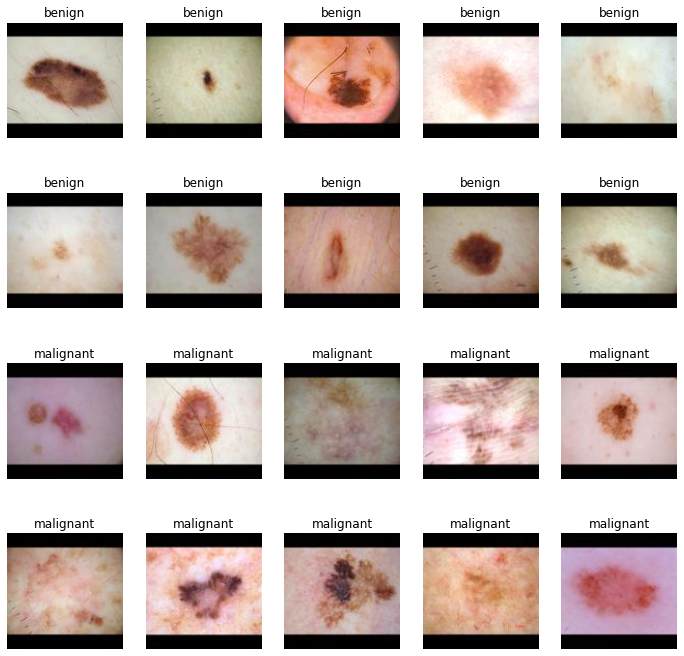

In [6]:
#plotting images
benign_image=df["image"][df["labels"]=="benign"][:10]
malignant_image=df["image"][df["labels"]=="malignant"][:10]
fig=plt.figure(figsize=(12, 12))
columns = 5
rows = 4
for i in range(1, (columns*rows)//2 + 1):
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(benign_image.iloc[i-1])
    plt.title("benign")
for i in range(11, (columns*rows) + 1):
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(malignant_image.iloc[i-11])
    plt.title("malignant")

In [7]:
#filling_na with unknown for anatom site general
df["anatom_general_site"].fillna(value="unknown",inplace=True)
print(df.count())

name                   2400
age_approx             2400
anatom_general_site    2400
sex                    2400
image                  2400
image_name             2400
labels                 2400
dtype: int64


In [8]:
#dropping irrelevant columns and creating dummy variables
df=df.drop(["name","image_name"],axis=1)
dummy_df=pd.get_dummies(df,columns=["sex","anatom_general_site"])
#getting images to numpy array
dummy_df["image"]=dummy_df["image"].map(lambda x: np.asarray(x,dtype="uint8"))
images=np.array([i[0] for idx,i in enumerate(dummy_df[["image"]].values)])
images=images/255
#getting labels to numpy array
y=dummy_df["labels"].map(lambda x: 1 if x =="benign" else 0).values
dummy_df=dummy_df.drop(["image","labels"],axis=1)
#getting features to numpy array
x=dummy_df.values

print(x.shape,images.shape,y.shape)

(2400, 11) (2400, 112, 112, 3) (2400,)


In [9]:
#splitting datasets into train and test
def split_data(images,x,y,splitPercent=0.8):
    idxs=[i for i in range(len(x))]
    random.seed(10)
    random.shuffle(idxs)
    
    splitOn=int(len(idxs)*splitPercent)
    train_idxs=idxs[0:splitOn]
    test_idxs=idxs[splitOn:]
    
    train_im=images[train_idxs]
    train_tab=x[train_idxs]
    train_y=y[train_idxs]

    test_im=images[test_idxs]
    test_tab=x[test_idxs]
    test_y=y[test_idxs]
        
    return (train_im, train_tab, train_y, test_im, test_tab, test_y)

image_train,x_train,y_train,image_test,x_test,y_test=split_data(images,x,y)

#printing shapes of split data
for i in [image_train,x_train,y_train,image_test,x_test,y_test]:
    print(i.shape)

(1920, 112, 112, 3)
(1920, 11)
(1920,)
(480, 112, 112, 3)
(480, 11)
(480,)
